In [10]:
from utils.tess import bounding_box, display, write_text, clean_text
import cv2
from pytesseract import pytesseract, Output
import pandas as pd

In [11]:
font = './fonts/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf'

In [12]:
img = cv2.imread('./images/IMG_ESC200507005_REQ_2_0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [13]:
config_tessract = r'--tessdata-dir ./tesstrain/data --user-words ./tesstrain/data/NanumGothic.wordlist --psm 6 --oem 1 -l NanumGothic+eng --loglevel ALL'
result = pytesseract.image_to_data(img, config=config_tessract, output_type=Output.DICT)
tess_result = pytesseract.image_to_data(img, config=config_tessract)

# result


TesseractError: (1, 'Error opening data file ./tesstrain/data/osd.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'osd\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')

In [ ]:
tess_list = list(map(lambda x: x.split('\t'), tess_result.split('\n')))

df = pd.DataFrame(tess_list[1:], columns=tess_list[0])
df.dropna(inplace=True)
df['text'] = df['text'].apply(clean_text)
df = df.query("text != '' ")
# df = df.query("block_num == '14' ")
df.tail(20)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
309,5,1,1,1,35,7,747,2298,26,53,84.212036,X
310,5,1,1,1,35,8,787,2298,109,54,23.857109,450
311,5,1,1,1,35,9,912,2298,69,53,47.966736,MK
312,5,1,1,1,35,10,1238,2321,81,54,63.697311,58
313,5,1,1,1,35,11,1334,2321,20,53,67.980522,3
315,5,1,1,1,35,13,1645,2321,67,54,61.737717,bes
317,5,1,1,1,36,1,238,2369,47,24,94.457146,UV
318,5,1,1,1,36,2,303,2369,192,25,94.457146,STERILIZER
320,5,1,1,1,37,1,142,2447,31,47,0.000000,g
321,5,1,1,1,37,2,236,2442,68,28,59.949165,Uv.


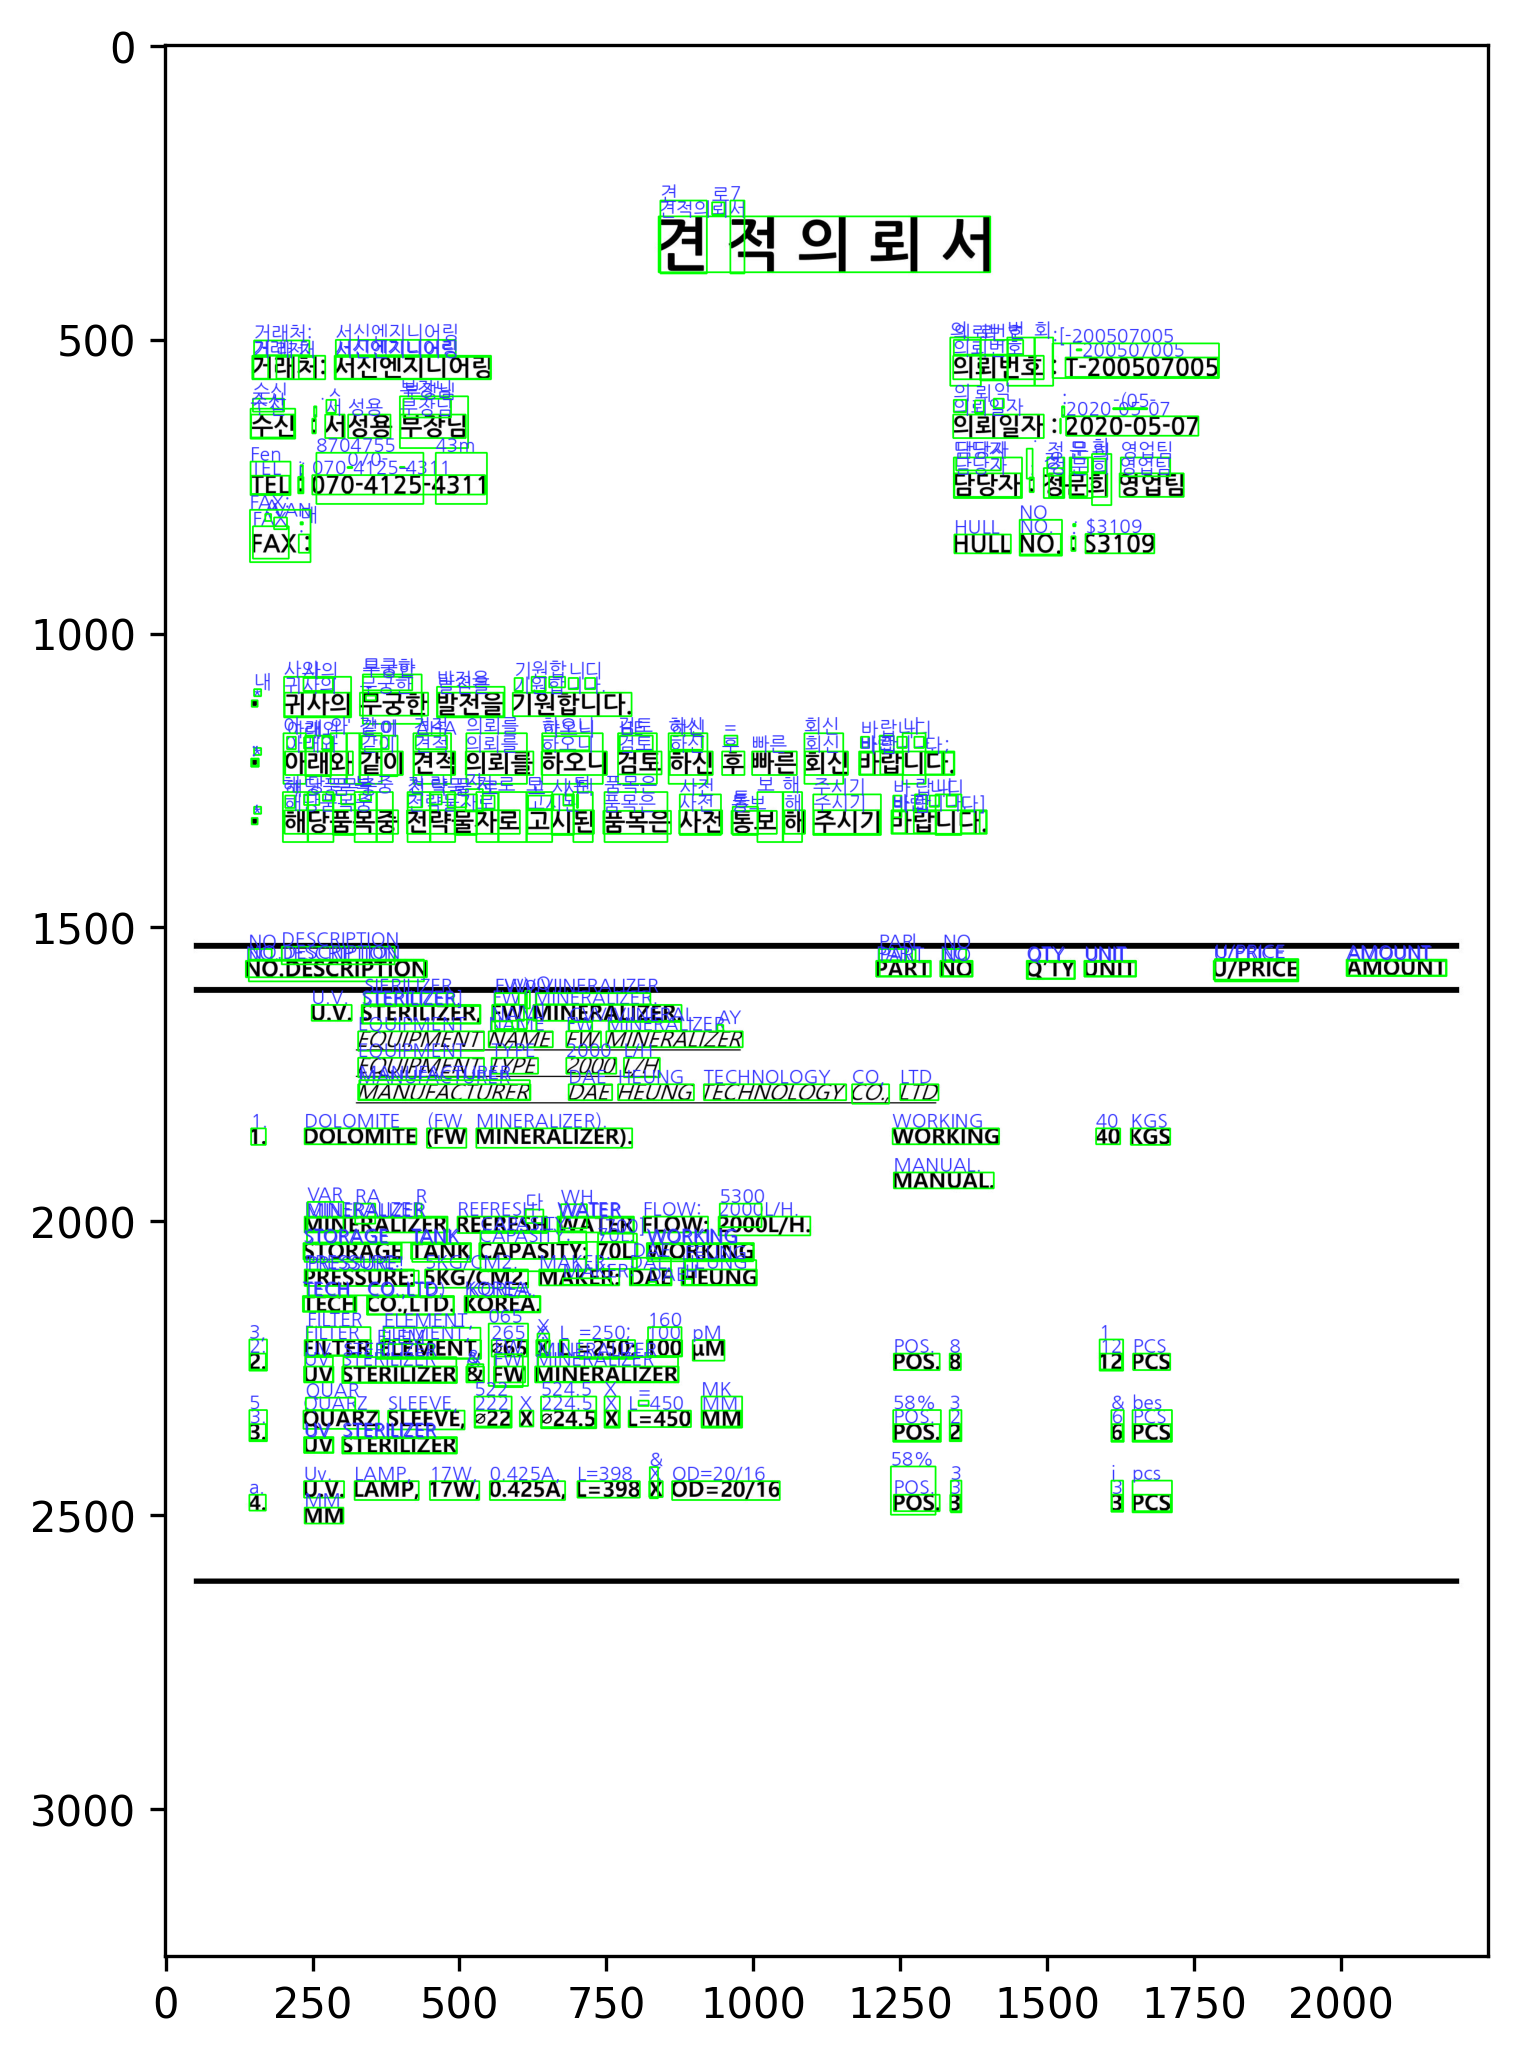

In [ ]:
img_copy = img.copy()

min_confidence = 40

for i in range(0, len(result['text'])):
    # print(i)
    confidence = int(result['conf'][i])
    text = result['text'][i]
    # print(confidence)
    if confidence > min_confidence:
        # print(confidence)
        x, y, img = bounding_box(result, img_copy, i)
        # print(x, y)
        # print(text)
        img_copy = write_text(img_copy, f'{text}', x, y, font)

    # print(f'{text}: ({confidence})')

display(img_copy)